# 1 - Introduction

Name : Huesca Rashad Nadiputra

Batch : FTDS-016-RMT

Dataset : GTSRB - German Traffic Sign Recognition Benchmark

Objective : Make an Image Classifications model using Artifical Neural Network

# 2 - Import Libraries

We will use the following libraries for this task.

In [97]:
# Import Libraries

import os
import pandas as pd
import matplotlib.pyplot as plt
import random
from matplotlib.image import imread
import cv2
from PIL import Image
import numpy as np
import plotly.express as px

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import accuracy_score, classification_report

import joblib
from tensorflow.keras.models import load_model

# 3 - Data Loading

First we are going to assign paths to our directory.

In [18]:
main_path= 'C:/Users/USER/Documents/Hacktiv8/2/Milestone/Input'
train_path = os.path.join(main_path, 'Train')
test_path = os.path.join(main_path, 'Test')

We can see how many categories we have in our train-set.

In [19]:
cat = len(os.listdir(train_path))
cat

43

We can also see how many images we have for each categories.

In [20]:
folders = os.listdir(train_path)

train_number = []
class_num = []

for folder in folders:
    train_files = os.listdir(train_path + '/' + folder)
    train_number.append(len(train_files))
    class_num.append(int(folder))

# Plotting the number of images in each class
train = {'Class':class_num, 'Number of Images':train_number}
train = pd.DataFrame(train).sort_values('Class').reset_index(drop=True)
train

Class  Number of Images
0       0               210
1       1              2220
2       2              2250
3       3              1410
4       4              1980
5       5              1860
6       6               420
7       7              1440
8       8              1410
9       9              1470
10     10              2010
11     11              1320
12     12              2100
13     13              2160
14     14               780
15     15               630
16     16               420
17     17              1110
18     18              1200
19     19               210
20     20               360
21     21               330
22     22               390
23     23               510
24     24               270
25     25              1500
26     26               600
27     27               240
28     28               540
29     29               270
30     30               450
31     31               780
32     32               240
33     33               689
34     34               420
35     35              1200
36     36               390
37     37               210
38     38              2070
39     39               300
40     40               360
41     41               240
42     42               240

How about the test-set? We can see how many images in the test-set.

In [21]:
test = os.listdir(test_path)
len(test)

12630

But because the directory didn't divide the images by their categories, we need to check the categories by looking at the csv from the main path directory.

In [22]:
test_df = pd.read_csv(main_path + '/Test.csv')
test_df.groupby('ClassId').count()

Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  Path
ClassId                                                     
0           60      60      60      60      60      60    60
1          720     720     720     720     720     720   720
2          750     750     750     750     750     750   750
3          450     450     450     450     450     450   450
4          660     660     660     660     660     660   660
5          630     630     630     630     630     630   630
6          150     150     150     150     150     150   150
7          450     450     450     450     450     450   450
8          450     450     450     450     450     450   450
9          480     480     480     480     480     480   480
10         660     660     660     660     660     660   660
11         420     420     420     420     420     420   420
12         690     690     690     690     690     690   690
13         720     720     720     720     720     720   720
14         270     270     270     270     270     270   270
15         210     210     210     210     210     210   210
16         150     150     150     150     150     150   150
17         360     360     360     360     360     360   360
18         390     390     390     390     390     390   390
19          60      60      60      60      60      60    60
20          90      90      90      90      90      90    90
21          90      90      90      90      90      90    90
22         120     120     120     120     120     120   120
23         150     150     150     150     150     150   150
24          90      90      90      90      90      90    90
25         480     480     480     480     480     480   480
26         180     180     180     180     180     180   180
27          60      60      60      60      60      60    60
28         150     150     150     150     150     150   150
29          90      90      90      90      90      90    90
30         150     150     150     150     150     150   150
31         270     270     270     270     270     270   270
32          60      60      60      60      60      60    60
33         210     210     210     210     210     210   210
34         120     120     120     120     120     120   120
35         390     390     390     390     390     390   390
36         120     120     120     120     120     120   120
37          60      60      60      60      60      60    60
38         690     690     690     690     690     690   690
39          90      90      90      90      90      90    90
40          90      90      90      90      90      90    90
41          60      60      60      60      60      60    60
42          90      90      90      90      90      90    90

# 4 - Exploratory Data Analysis (EDA)

## 4.1 - Meta Data

Meta data is our reference data, which determine what kind of images every classification should be.

In [23]:
# Get Meta Data
meta = pd.read_csv(main_path + '/Meta.csv')
meta_imgs = meta["Path"].values

metadata =[]

for img in meta_imgs:
    try:
        image = cv2.imread(main_path + '/' +img)
        metadata.append(np.array(image))
    except:
        print("Error in " + img)
X_meta = np.array(metadata)
X_meta = X_meta/255
X_meta.shape

C:\Users\USER\AppData\Local\Temp\ipykernel_12052\3634703356.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_meta = np.array(metadata)


(43,)

We will now visualize all of our meta data.

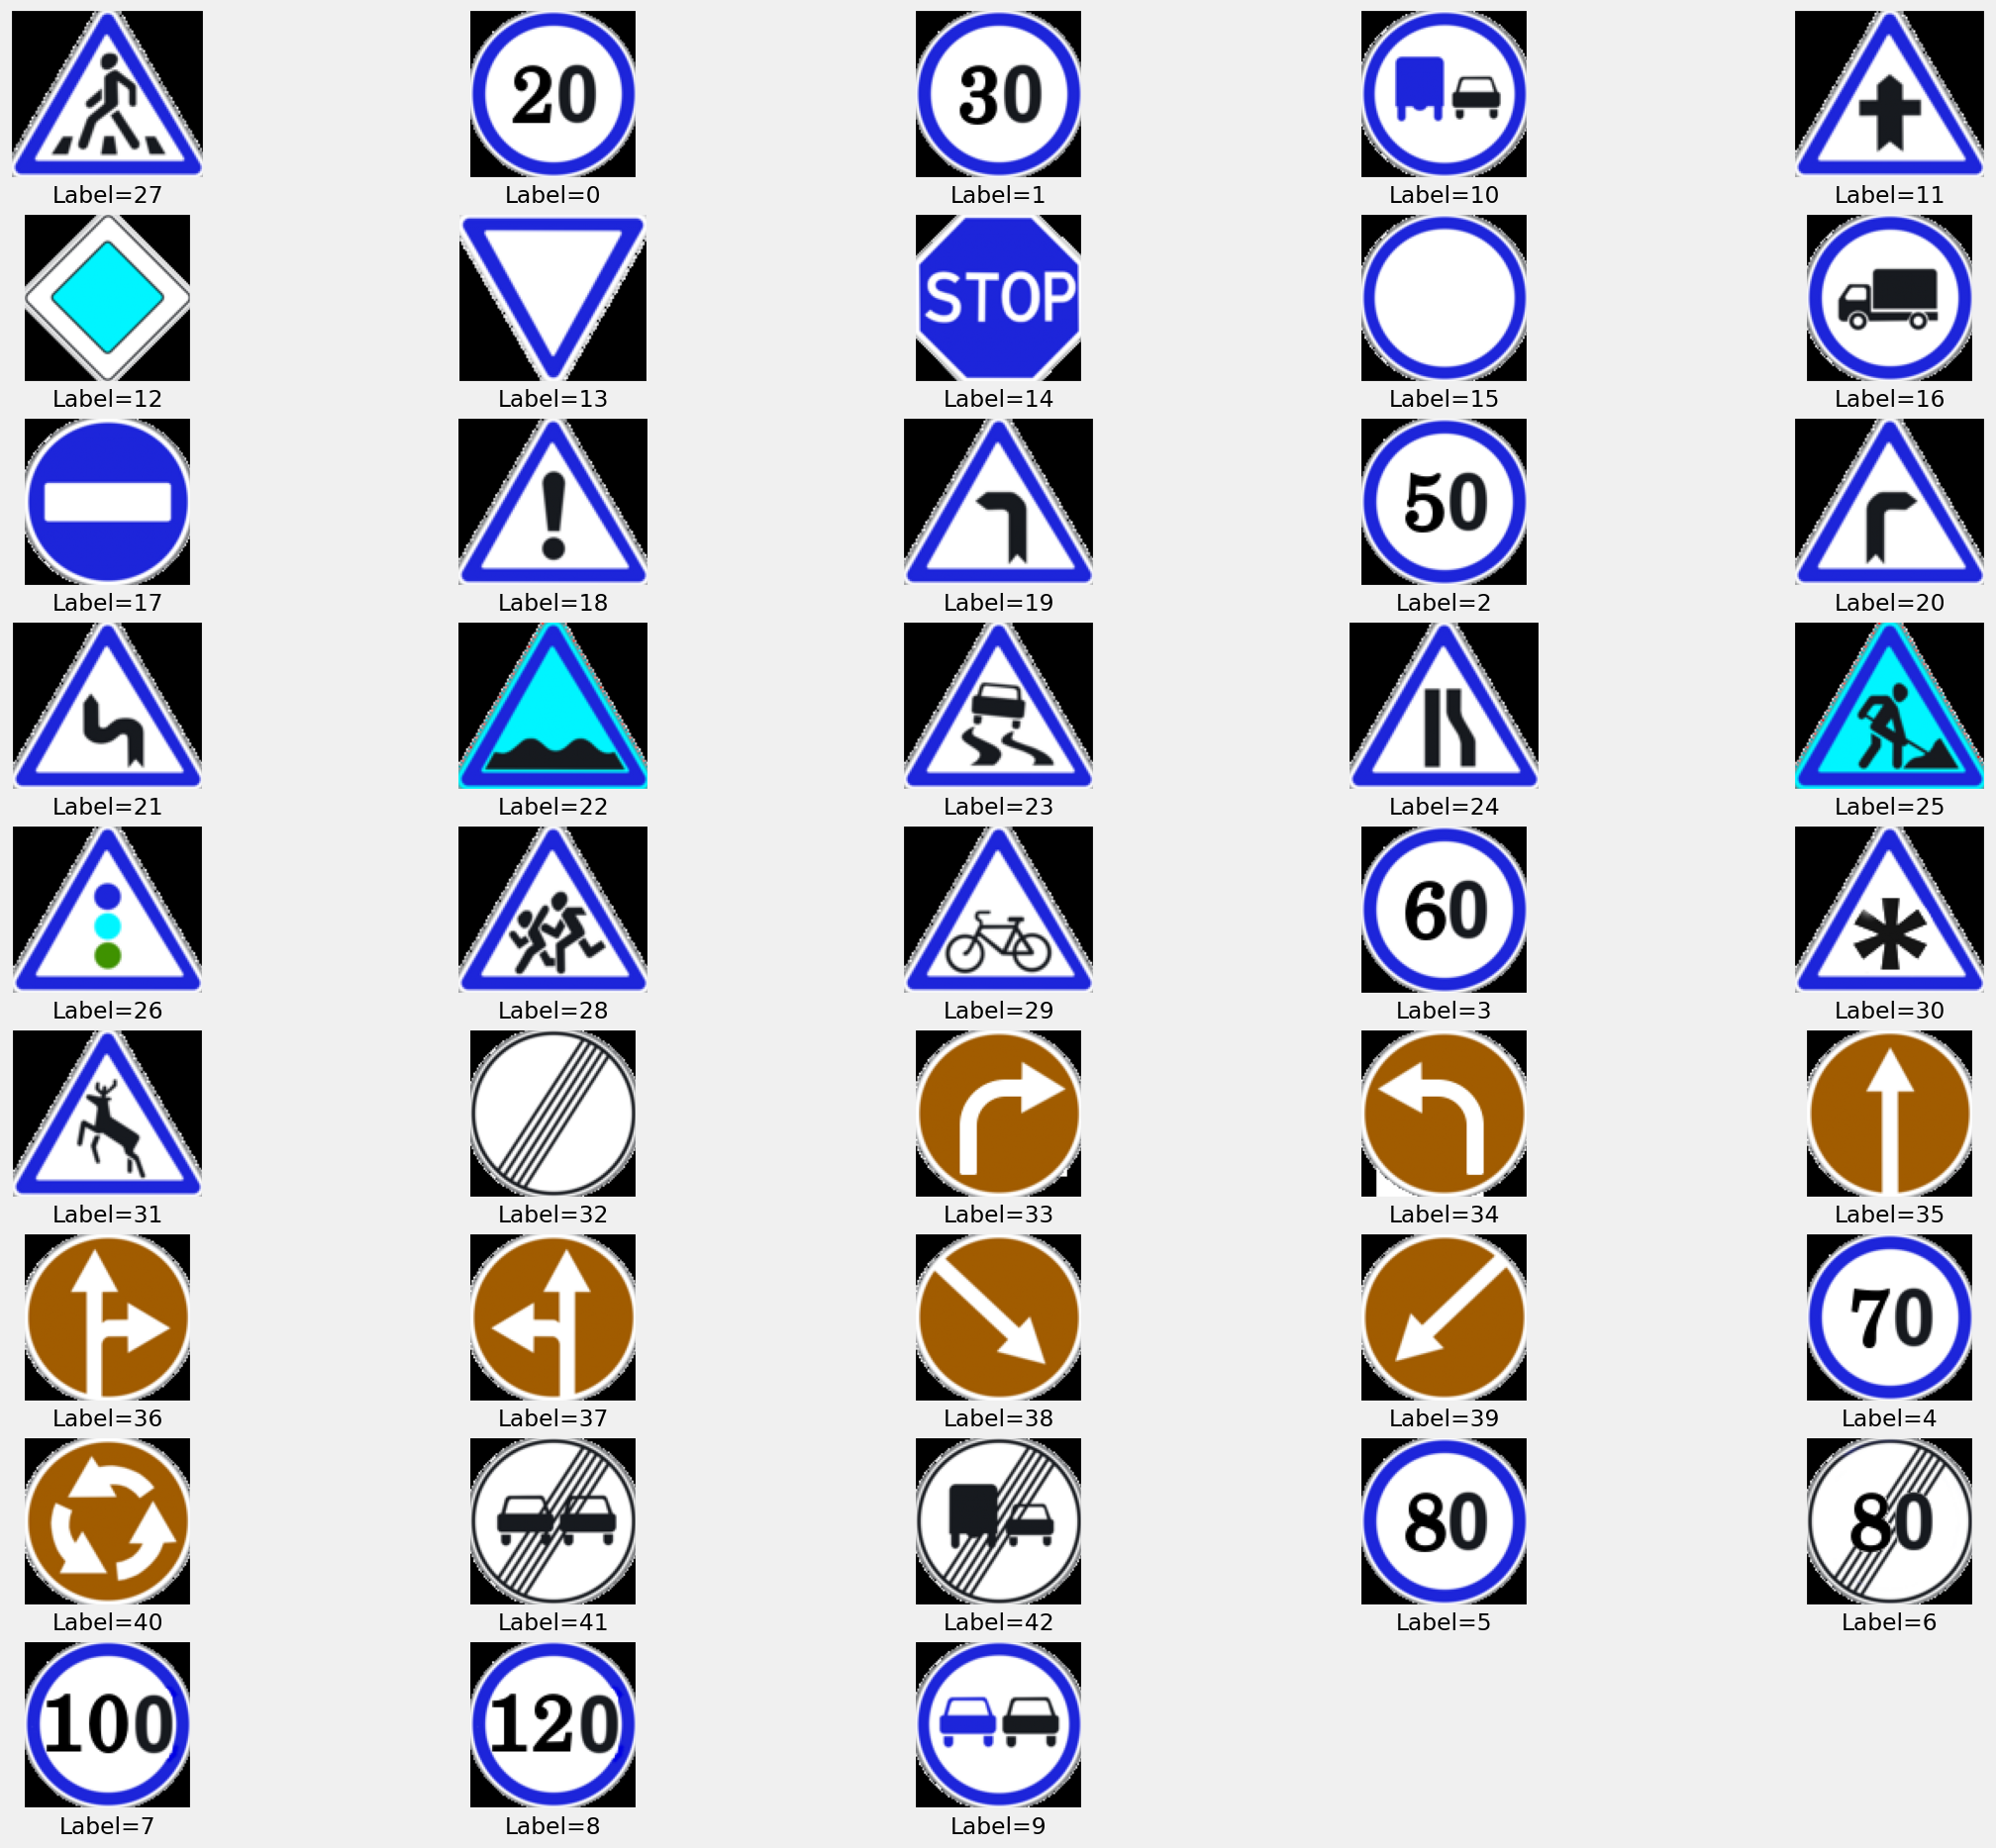

In [24]:
# Visualizing Meta Data
meta_labels = meta["ClassId"].values

plt.figure(figsize=(25,25))

start_index = 0
for i in range(43):
    plt.subplot(10, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    a = meta_labels[start_index + i]
    plt.xlabel('Label={}'.format(a))
    plt.imshow(X_meta[start_index + i])

## 4.2 - Test Set

We can see some samples on our test-set to figure out what the images looks like.

C:\Users\USER\AppData\Local\Temp\ipykernel_12052\2658563386.py:12: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)


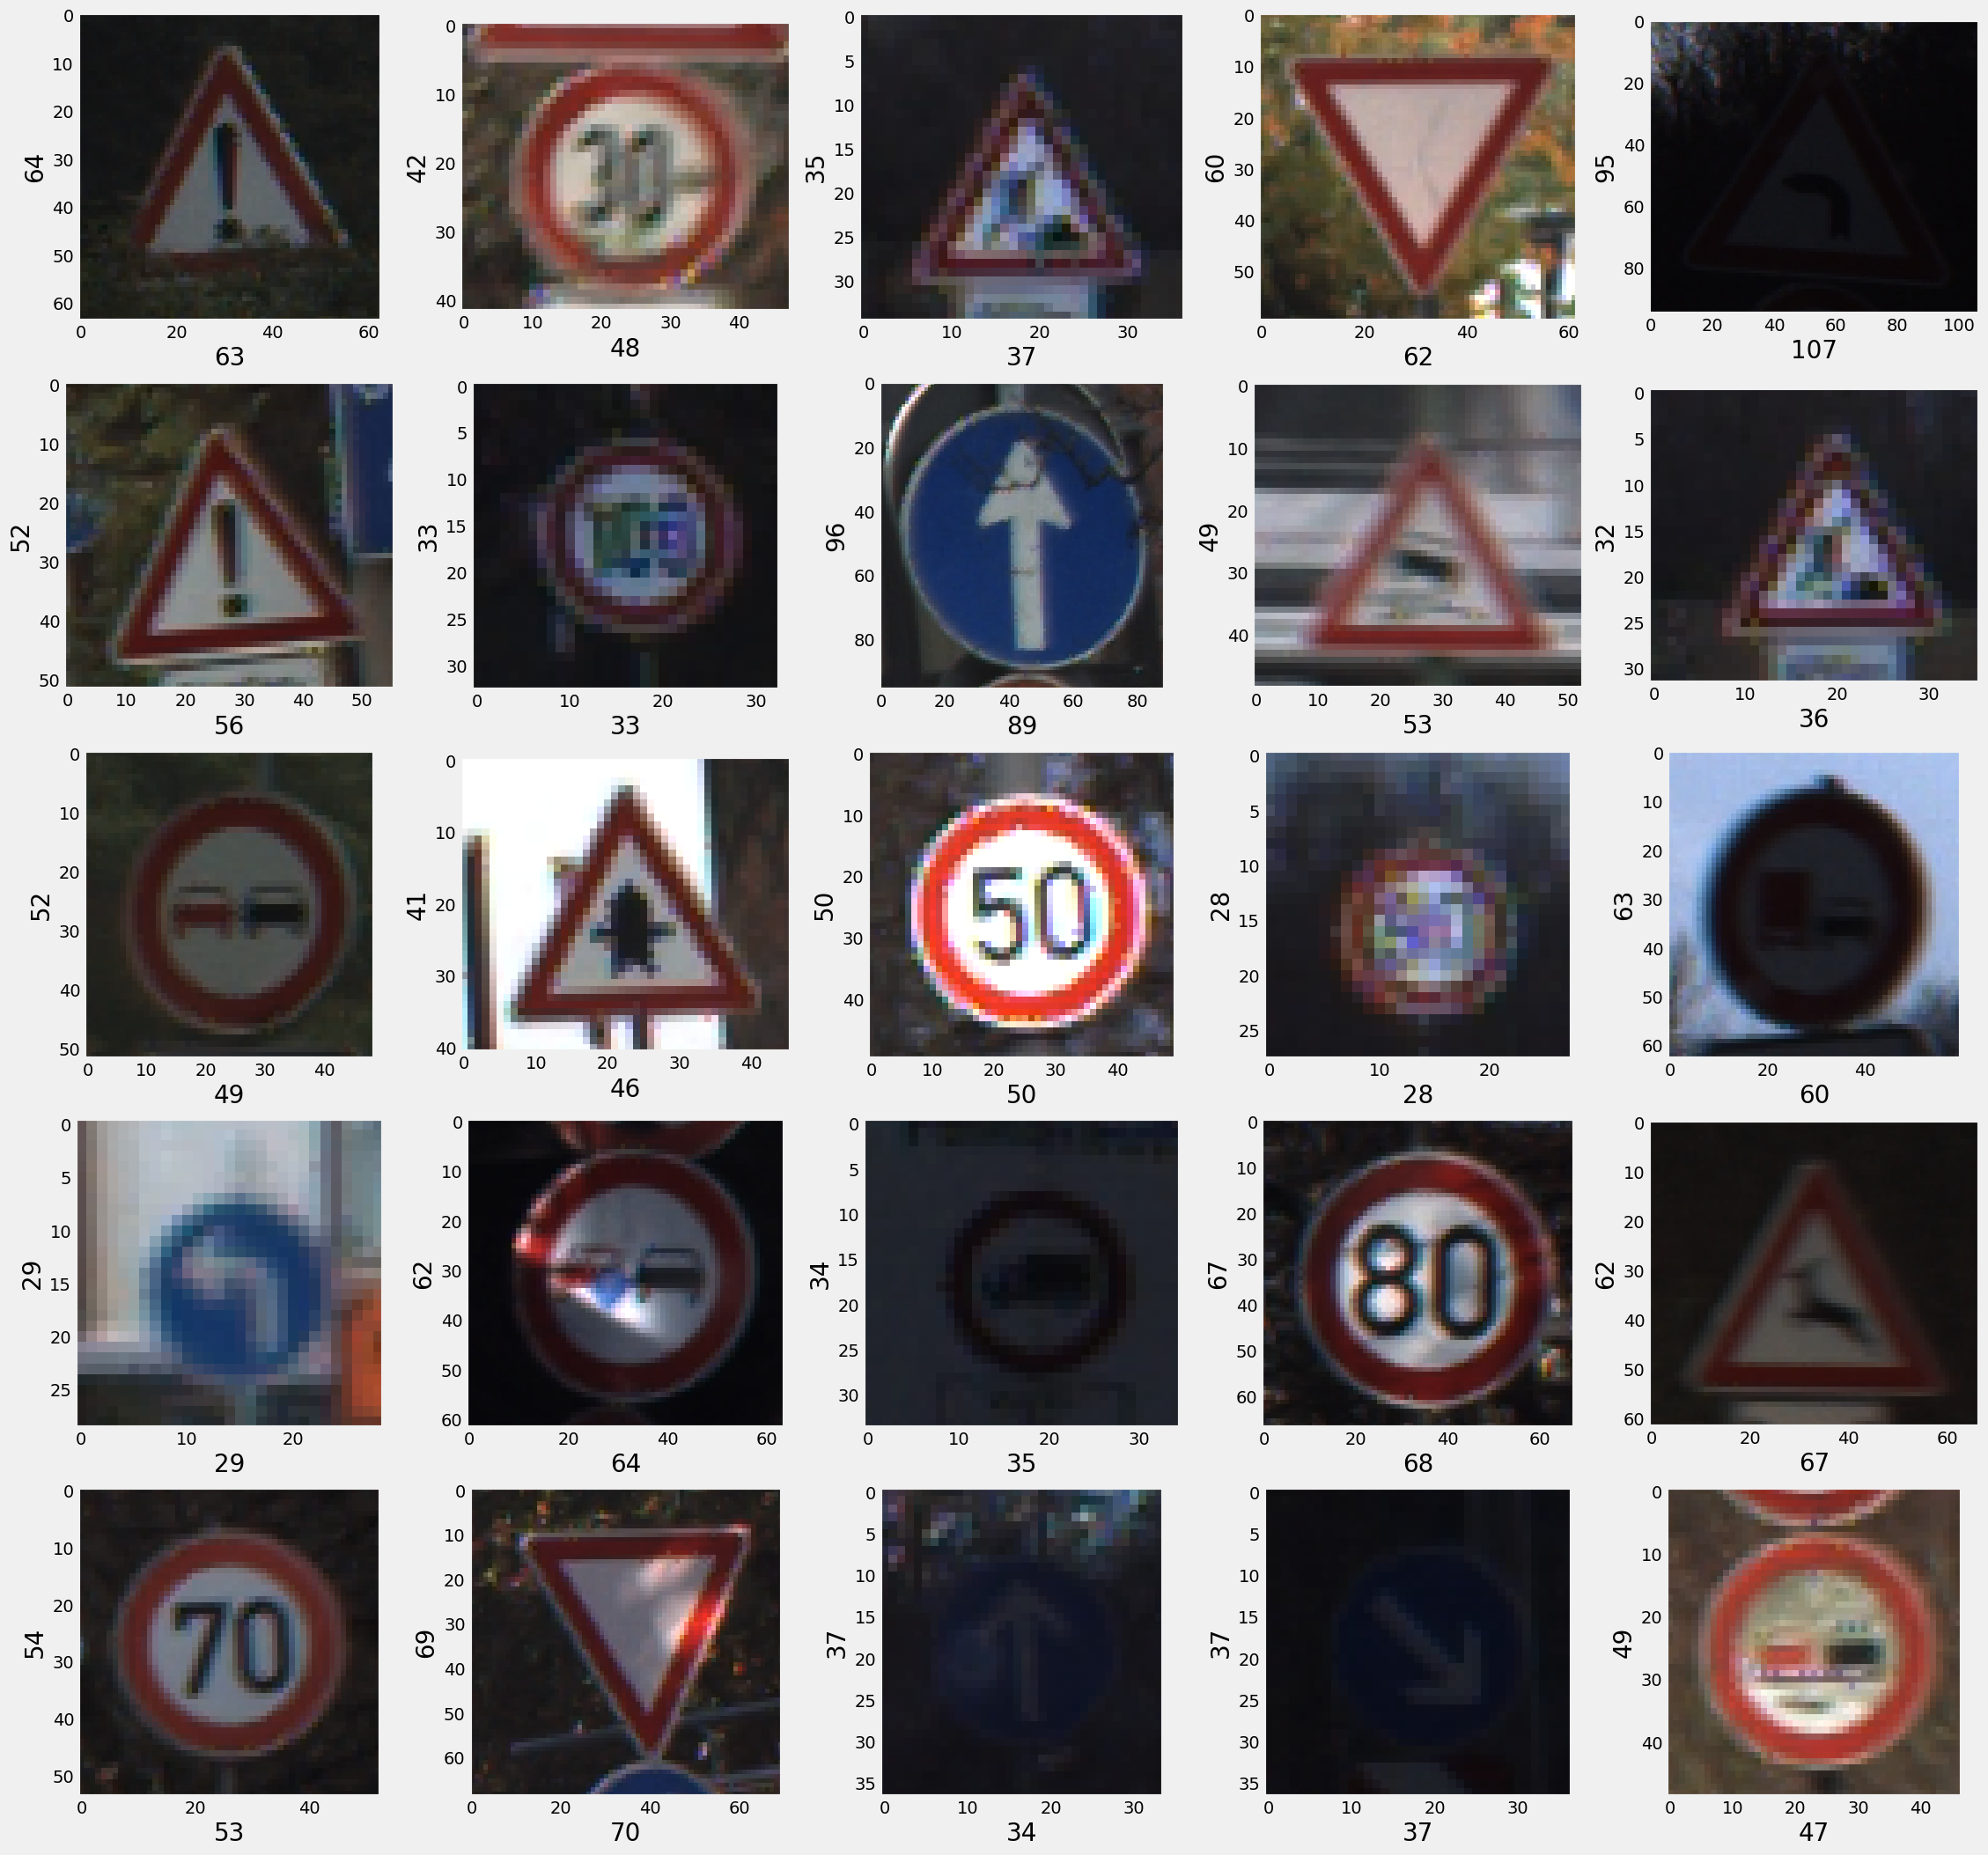

In [25]:
# Visualizing 25 random images from test data
test = pd.read_csv(main_path + '/Test.csv')
imgs = test["Path"].values

plt.figure(figsize=(25,25))

for i in range(1,26):
    plt.subplot(5,5,i)
    random_img_path = main_path + '/' + random.choice(imgs)
    rand_img = imread(random_img_path)
    plt.imshow(rand_img)
    plt.grid(b=None)
    plt.xlabel(rand_img.shape[1], fontsize = 20)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 20)#height of image

We can see that the images have various height and width, and it is important to resize it to a single size.

## 4.3 - Train Set

From previous visualization we know that the data have varied height and weight, so we will resize it, we will use 32x32 pixels for the new size.

In [26]:
img_height= 32
img_width= 32

Now let's see out train-set shape after we resize all our images.

In [27]:
image_data = []
image_labels = []

for i in range(cat):
    path = main_path + '/Train/' + str(i)
    images = os.listdir(path)

    for img in images:
        try:
            image = cv2.imread(path + '/' + img)
            image_fromarray = Image.fromarray(image, 'RGB')
            resize_image = image_fromarray.resize((img_height, img_width))
            image_data.append(np.array(resize_image))
            image_labels.append(i)
        except:
            print("Error in " + img)

# Changing the list to numpy array
image_data = np.array(image_data)
image_labels = np.array(image_labels)

print(image_data.shape, image_labels.shape)

(39209, 32, 32, 3) (39209,)


We can see that we have 39209 images with size of 32x32 pixels and 3 channels (RGB).

# 5 - Data Preprocessing

## 5.1 - Get Validation Data

We are going to get some data for our validation-set by splitting our train-set, but we will shuffle the train-set first.

In [28]:
shuffle_indexes = np.arange(image_data.shape[0])
np.random.shuffle(shuffle_indexes)
image_data = image_data[shuffle_indexes]
image_labels = image_labels[shuffle_indexes]

In [29]:
X_train, X_val, y_train, y_val = train_test_split(image_data, image_labels, test_size=0.3, random_state=1, shuffle=True)

X_train = X_train/255 
X_val = X_val/255

print("X_train.shape", X_train.shape)
print("X_valid.shape", X_val.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_val.shape)

X_train.shape (27446, 32, 32, 3)
X_valid.shape (11763, 32, 32, 3)
y_train.shape (27446,)
y_valid.shape (11763,)


Now we will convert all our targets to binary class matrix.

In [30]:
y_train = keras.utils.to_categorical(y_train, cat)
y_val = keras.utils.to_categorical(y_val, cat)

print(y_train.shape)
print(y_val.shape)

(27446, 43)
(11763, 43)


## 5.2 - Augmentation

We will define our image augmentation that we will use later.

In [31]:
aug = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    zoom_range=0.15)

# 6 - Model Definition

We are going to use Sequential API for this model, with the following architecture:
- Use 3 convolution layers, with filters that doubles the previous layer, and same kernel size which is 3.
- Every convolution layers is followed by maxpooling with pool size and strides set to 2.
- After all the convolution and maxpooling layers, we will add flatten and then another hidden layer with neuron that doubled the last convolution layer.
- All the hidden layers will use the same activation which is relu.
- Output layer have 43 classes and uses softmax as the activation.

For our compile we will use categorical cross entropy with adam optimizer and accuracy as our metrics.

In [32]:
inputs= [img_height,img_width,3]

# Create Sequential API
model_seq = Sequential()

#Layer Conv 1
model_seq.add(Conv2D(filters=16, kernel_size=3, activation='relu', input_shape=inputs))
model_seq.add(MaxPooling2D(pool_size= 2, strides=2))

#Layer Conv 2
model_seq.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model_seq.add(MaxPooling2D(pool_size= 2, strides=2))

#Layer Conv 3
model_seq.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model_seq.add(MaxPooling2D(pool_size= 2, strides=2))

model_seq.add(Flatten())
model_seq.add(Dense(units=128, activation='relu'))
model_seq.add(Dense(units=43,activation='softmax'))

# Compile
model_seq.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [33]:
model_seq.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 2, 2, 64)        

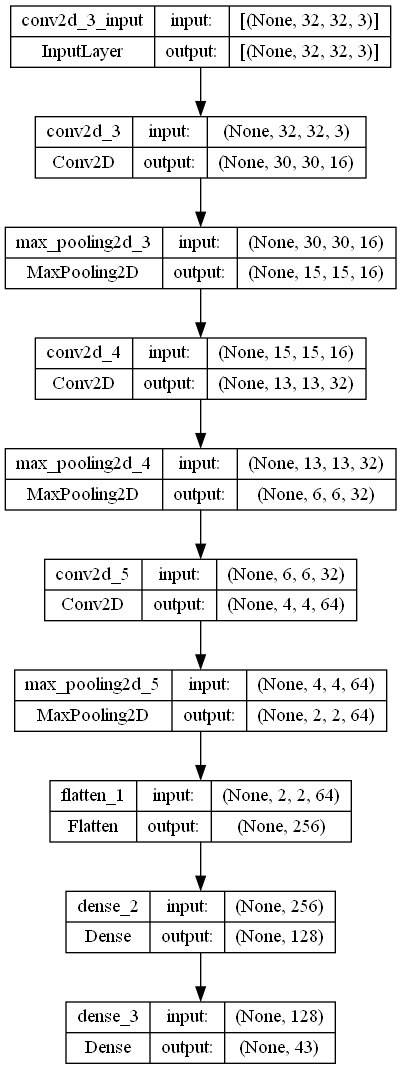

In [34]:
# Plot Layers

tf.keras.utils.plot_model(model_seq, show_shapes=True)

# 7 - Model Training

We will now train our model and use the augmentation that we have defined before.

In [36]:
%%time
train_aug = model_seq.fit(aug.flow(X_train, y_train, batch_size=32), epochs=50, validation_data=(X_val, y_val))

Epoch 1/50
858/858 [==============================] - 16s 18ms/step - loss: 2.6769 - accuracy: 0.2420 - val_loss: 1.6324 - val_accuracy: 0.4893
Epoch 2/50
858/858 [==============================] - 14s 17ms/step - loss: 1.4601 - accuracy: 0.5360 - val_loss: 0.8305 - val_accuracy: 0.7441
Epoch 3/50
858/858 [==============================] - 14s 16ms/step - loss: 0.9586 - accuracy: 0.6917 - val_loss: 0.4692 - val_accuracy: 0.8643
Epoch 4/50
858/858 [==============================] - 14s 17ms/step - loss: 0.6970 - accuracy: 0.7786 - val_loss: 0.3996 - val_accuracy: 0.8698
Epoch 5/50
858/858 [==============================] - 15s 18ms/step - loss: 0.5437 - accuracy: 0.8287 - val_loss: 0.2300 - val_accuracy: 0.9259
Epoch 6/50
858/858 [==============================] - 15s 17ms/step - loss: 0.4491 - accuracy: 0.8579 - val_loss: 0.2037 - val_accuracy: 0.9369
Epoch 7/50
858/858 [==============================] - 15s 17ms/step - loss: 0.3606 - accuracy: 0.8867 - val_loss: 0.1648 - val_accuracy:

# 8 - Model Evaluation

## 8.1 - Base Model

In [37]:
# Create DataFrame

history_seq_df = pd.DataFrame(train_aug.history)
history_seq_df

loss  accuracy  val_loss  val_accuracy
0   2.676926  0.242039  1.632429      0.489331
1   1.460078  0.535998  0.830471      0.744113
2   0.958579  0.691722  0.469197      0.864320
3   0.696961  0.778620  0.399597      0.869761
4   0.543740  0.828682  0.229971      0.925869
5   0.449147  0.857866  0.203657      0.936921
6   0.360562  0.886650  0.164812      0.947207
7   0.316716  0.900168  0.123058      0.959789
8   0.281166  0.914159  0.142872      0.955454
9   0.244357  0.923996  0.098898      0.970331
10  0.229078  0.930810  0.076365      0.979002
11  0.196663  0.938680  0.074255      0.976452
12  0.184609  0.942651  0.067800      0.979257
13  0.174926  0.946003  0.060276      0.982913
14  0.150035  0.954820  0.060266      0.983593
15  0.149734  0.954274  0.070945      0.977982
16  0.138792  0.957808  0.048936      0.986823
17  0.135719  0.958391  0.063931      0.980362
18  0.123222  0.962035  0.060095      0.982232
19  0.123763  0.961524  0.050223      0.985038
20  0.111813  0.966698  0.062001      0.983338
21  0.106870  0.967354  0.047312      0.985888
22  0.104060  0.967682  0.050531      0.984783
23  0.105204  0.967026  0.038055      0.989713
24  0.095960  0.971581  0.047116      0.986313
25  0.099169  0.969285  0.026606      0.992859
26  0.091606  0.971143  0.037046      0.990734
27  0.088584  0.973621  0.030991      0.991924
28  0.082037  0.974277  0.052783      0.984358
29  0.085498  0.972783  0.047171      0.987503
30  0.081022  0.975734  0.027485      0.991584
31  0.075641  0.977702  0.045755      0.986058
32  0.079198  0.976609  0.033888      0.990479
33  0.072433  0.977447  0.023236      0.993284
34  0.069872  0.978613  0.031417      0.990819
35  0.076226  0.977082  0.036205      0.988438
36  0.069181  0.978503  0.020584      0.994389
37  0.069118  0.979414  0.047578      0.987078
38  0.070577  0.979232  0.027181      0.993029
39  0.066660  0.979123  0.026807      0.992604
40  0.065061  0.980034  0.027526      0.993199
41  0.069515  0.978758  0.023845      0.992264
42  0.068817  0.979778  0.037434      0.988523
43  0.059685  0.982548  0.023727      0.993284
44  0.066167  0.980507  0.025991      0.990989
45  0.060431  0.982183  0.025453      0.993709
46  0.061631  0.982037  0.034542      0.990309
47  0.061293  0.981965  0.026079      0.993199
48  0.057918  0.983094  0.021547      0.993454
49  0.053497  0.983932  0.019735      0.994474

<AxesSubplot: >

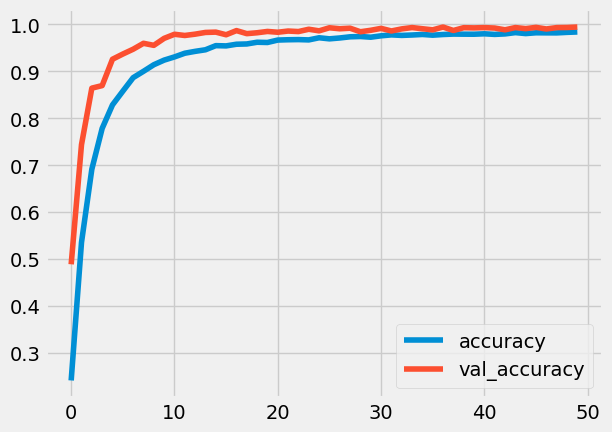

In [38]:
# Plot between accuracy and val_accuracy


history_seq_df[['accuracy', 'val_accuracy']].plot()

<AxesSubplot: >

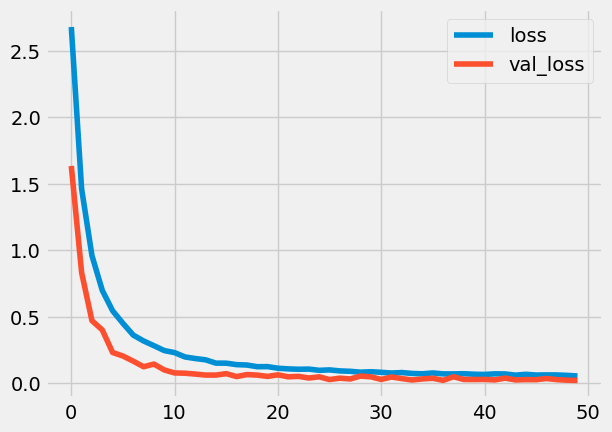

In [39]:
# Plot between loss and val_loss

history_seq_df[['loss', 'val_loss']].plot()

We can see from the two graphs above that the data didn't show any signs of vanishing or exploding and it is still improving along with the number of epochs.
We will now get the test data to determine the model performance.

In [43]:
labels = test["ClassId"].values
data =[]

for img in imgs:
    try:
        image = cv2.imread(main_path + '/' +img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((img_height, img_width))
        data.append(np.array(resize_image))
    except:
        print("Error in " + img)
X_test = np.array(data)
X_test = X_test/255
X_test.shape

(12630, 32, 32, 3)

In [45]:
pred = model_seq.predict(X_test) 
pred_class =np.argmax(pred,axis=1)

print('Test Data accuracy: ',accuracy_score(labels, pred_class)*100)

395/395 [==============================] - 2s 4ms/step
Test Data accuracy:  94.96437054631829


Our model could predict the test-set with 94.96% accuracy which is pretty good. Now we will visualize some of this prediction to get better understanding of the results.

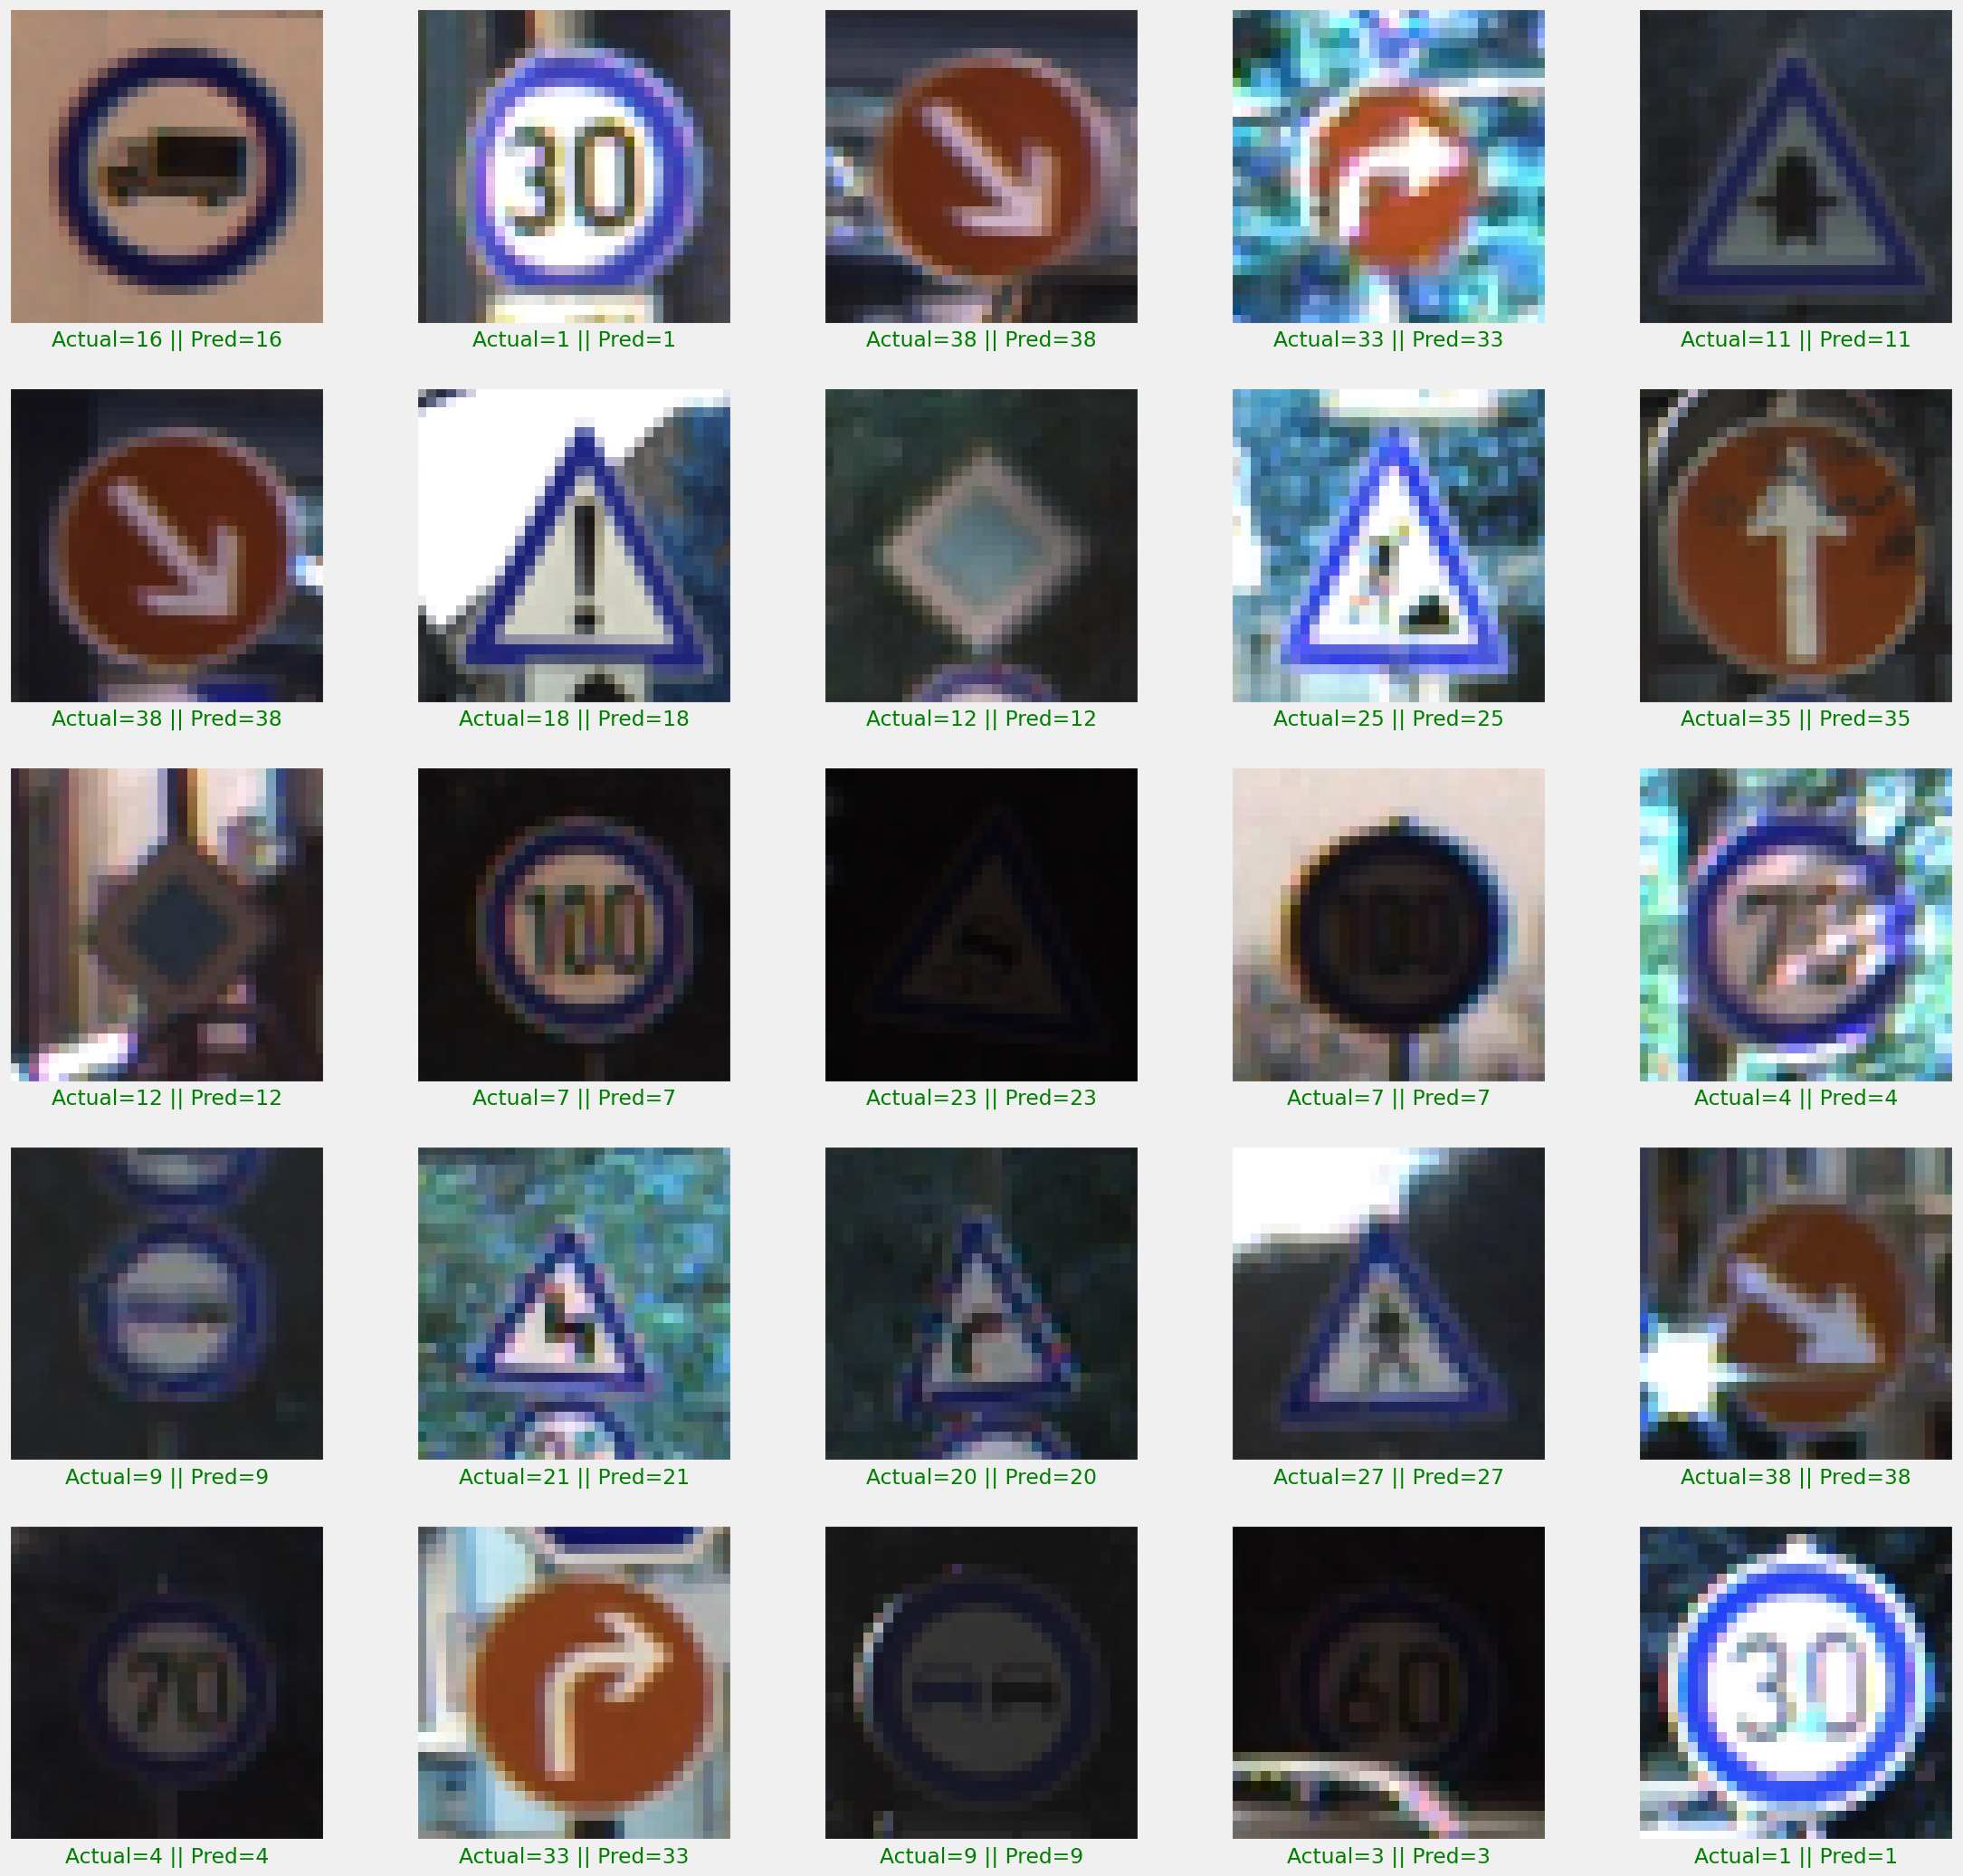

In [84]:
plt.figure(figsize = (25, 25))

start_index = 0
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = pred_class[start_index + i]
    actual = labels[start_index + i]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)
    plt.imshow(X_test[start_index + i])
plt.show()

We can also analyze this further by trying to find which class that is harder for our model to predict.

In [85]:
print(classification_report(labels, pred_class))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        60
           1       0.96      0.99      0.98       720
           2       0.98      0.96      0.97       750
           3       0.94      0.96      0.95       450
           4       1.00      0.96      0.98       660
           5       0.93      0.96      0.94       630
           6       0.99      0.95      0.97       150
           7       1.00      0.95      0.97       450
           8       0.98      0.98      0.98       450
           9       0.99      0.98      0.98       480
          10       1.00      0.99      0.99       660
          11       0.84      0.92      0.88       420
          12       1.00      0.95      0.97       690
          13       0.96      1.00      0.98       720
          14       0.88      1.00      0.93       270
          15       0.99      0.99      0.99       210
          16       0.92      1.00      0.96       150
          17       1.00    

From the f1-score, we could see that our models have some difficulties to predict some classes like 21 and 32 that have f1-score below 80%, but the worst one is class 27 that only have f1-score around 59%. 

In [86]:
result = {'Labels':labels,'Prediction':pred_class}
result = pd.DataFrame(result)
res1 = result[result['Labels']==27]
res2 = result[result['Prediction']==27]

In [87]:
def sunb_plots(df, var1, var2):
    ## dataframe creation - for plotting
    df_combinations = (
        df.groupby([var1, var2])
        .size()
        .reset_index()
        .rename(columns={0: "count"})
    )
    ## Creating sunburst chart
    # define figure element
    fig = px.sunburst(
        df,
        path=[var1, var2],
        color=var1)
    fig.update_traces(textinfo="label+percent parent")
    
    # display the figure
    fig.show()

In [88]:
sunb_plots(res1, 'Labels', 'Prediction')

In [89]:
sunb_plots(res2, 'Prediction', 'Labels')

From the two plots, we can see that the model have some difficulties to determined class 27 from other class like 11,18,24,25, and 30. If we look back at our meta data we can see that all of this class have something in common which is the shape of the sign is all triangle, so we could assume that the model have difficulties to read triangle signs, especially class 27.

## 8.2 - Model Improvement

We will try to improve our model by applying normalization layer in our API.

In [90]:
# Create Sequential API
model_seq2 = Sequential()

#Layer Conv 1
model_seq2.add(Conv2D(filters=16, kernel_size=3, activation='relu', input_shape=inputs))
model_seq2.add(MaxPooling2D(pool_size= 2, strides=2))
model_seq2.add(BatchNormalization())

#Layer Conv 2
model_seq2.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model_seq2.add(MaxPooling2D(pool_size= 2, strides=2))
model_seq2.add(BatchNormalization())

#Layer Conv 3
model_seq2.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model_seq2.add(MaxPooling2D(pool_size= 2, strides=2))
model_seq2.add(BatchNormalization())

model_seq2.add(Flatten())
model_seq2.add(Dense(units=128, activation='relu'))
model_seq2.add(BatchNormalization())
model_seq2.add(Dense(units=43,activation='softmax'))

# Compile
model_seq2.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

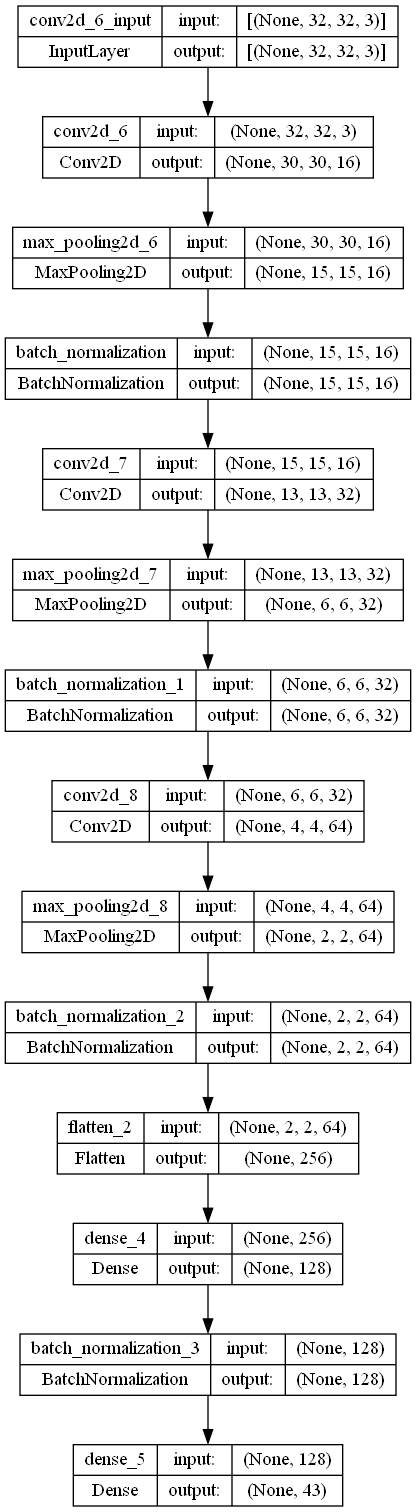

In [91]:
# Plot Layers

tf.keras.utils.plot_model(model_seq2, show_shapes=True)

In [92]:
%%time
train_aug2 = model_seq2.fit(aug.flow(X_train, y_train, batch_size=32), epochs=50, validation_data=(X_val, y_val))

Epoch 1/50
858/858 [==============================] - 19s 22ms/step - loss: 1.7913 - accuracy: 0.4905 - val_loss: 0.6753 - val_accuracy: 0.7893
Epoch 2/50
858/858 [==============================] - 17s 20ms/step - loss: 0.7457 - accuracy: 0.7689 - val_loss: 0.3987 - val_accuracy: 0.8798
Epoch 3/50
858/858 [==============================] - 16s 18ms/step - loss: 0.4559 - accuracy: 0.8563 - val_loss: 0.1828 - val_accuracy: 0.9422
Epoch 4/50
858/858 [==============================] - 17s 20ms/step - loss: 0.3281 - accuracy: 0.8978 - val_loss: 0.1208 - val_accuracy: 0.9622
Epoch 5/50
858/858 [==============================] - 17s 20ms/step - loss: 0.2503 - accuracy: 0.9213 - val_loss: 0.0797 - val_accuracy: 0.9746
Epoch 6/50
858/858 [==============================] - 20s 24ms/step - loss: 0.2178 - accuracy: 0.9324 - val_loss: 0.1036 - val_accuracy: 0.9668
Epoch 7/50
858/858 [==============================] - 18s 21ms/step - loss: 0.1780 - accuracy: 0.9423 - val_loss: 0.0499 - val_accuracy:

In [93]:
# Create DataFrame

history_seq_df2 = pd.DataFrame(train_aug2.history)
history_seq_df2

loss  accuracy  val_loss  val_accuracy
0   1.791288  0.490454  0.675350      0.789254
1   0.745687  0.768892  0.398660      0.879793
2   0.455942  0.856300  0.182797      0.942192
3   0.328124  0.897763  0.120819      0.962170
4   0.250335  0.921336  0.079739      0.974581
5   0.217751  0.932413  0.103552      0.966845
6   0.178041  0.942323  0.049895      0.985208
7   0.156083  0.949027  0.109844      0.965230
8   0.147691  0.954165  0.049725      0.984273
9   0.138265  0.955950  0.038705      0.989288
10  0.118036  0.963018  0.029415      0.991499
11  0.115460  0.963966  0.045752      0.985803
12  0.104383  0.965569  0.043234      0.986823
13  0.109034  0.965314  0.027402      0.991244
14  0.092477  0.971289  0.027385      0.991754
15  0.098793  0.968593  0.045998      0.985973
16  0.092595  0.970378  0.024006      0.992264
17  0.083715  0.973184  0.019854      0.994729
18  0.076087  0.975151  0.039989      0.988098
19  0.072589  0.976171  0.030668      0.991754
20  0.072296  0.976645  0.027931      0.991074
21  0.072291  0.976900  0.031345      0.990819
22  0.066066  0.978430  0.016501      0.995579
23  0.066580  0.978758  0.020366      0.993964
24  0.062912  0.979924  0.021923      0.993709
25  0.067025  0.977192  0.015017      0.996089
26  0.055303  0.982001  0.012065      0.996514
27  0.060426  0.980580  0.018893      0.994049
28  0.063114  0.979706  0.015913      0.994899
29  0.056847  0.982584  0.027027      0.992349
30  0.055362  0.981892  0.020040      0.994049
31  0.058990  0.981199  0.016288      0.995154
32  0.054704  0.981710  0.016823      0.994644
33  0.055415  0.982620  0.022986      0.993029
34  0.052846  0.982693  0.016858      0.994219
35  0.048101  0.984661  0.014979      0.995239
36  0.047944  0.984114  0.015003      0.995409
37  0.046010  0.985171  0.016542      0.995409
38  0.047105  0.984916  0.018252      0.994729
39  0.049586  0.984770  0.018769      0.994304
40  0.043766  0.986191  0.014803      0.996174
41  0.046893  0.985098  0.019686      0.994644
42  0.047114  0.984442  0.027061      0.990564
43  0.043666  0.985790  0.011179      0.996770
44  0.045002  0.985900  0.016956      0.995664
45  0.041260  0.986300  0.012810      0.996599
46  0.042841  0.986592  0.011058      0.997025
47  0.040995  0.986847  0.012221      0.996770
48  0.041649  0.986228  0.011357      0.997110
49  0.039691  0.987321  0.014652      0.995834

<AxesSubplot: >

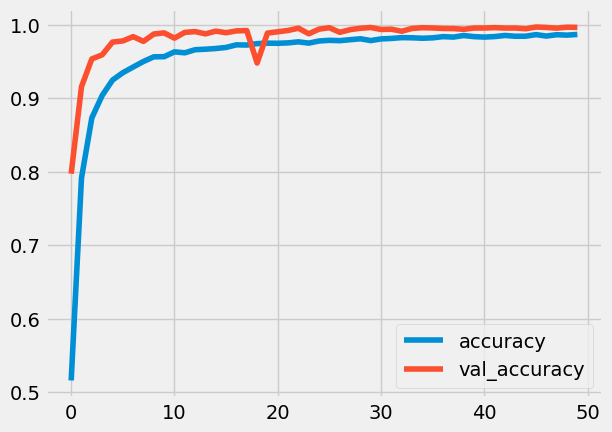

In [33]:
# Plot between accuracy and val_accuracy


history_seq_df2[['accuracy', 'val_accuracy']].plot()

<AxesSubplot: >

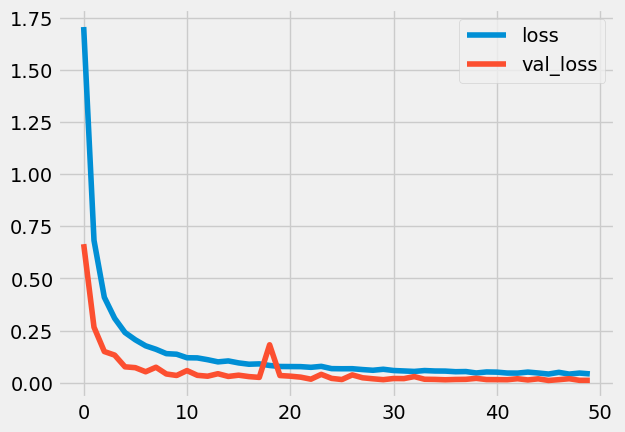

In [34]:
# Plot between loss and val_loss

history_seq_df2[['loss', 'val_loss']].plot()

From the two curve we can see that this model have similar performance with the base model.

In [95]:
pred2 = model_seq2.predict(X_test) 
pred_class2 =np.argmax(pred2,axis=1)

print('Test Data accuracy: ',accuracy_score(labels, pred_class2)*100)

395/395 [==============================] - 2s 5ms/step
Test Data accuracy:  96.95961995249405


This new model have better accuracy than the base model which is about 2% from 94.96% to 96.96%, now let's see the the accuracy for each class.

In [98]:
print(classification_report(labels, pred_class2))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98        60
           1       0.96      1.00      0.98       720
           2       0.97      0.98      0.97       750
           3       0.96      0.98      0.97       450
           4       0.99      0.97      0.98       660
           5       0.98      0.96      0.97       630
           6       1.00      0.92      0.96       150
           7       0.98      0.98      0.98       450
           8       0.99      0.99      0.99       450
           9       0.98      0.99      0.99       480
          10       0.99      1.00      1.00       660
          11       0.97      0.99      0.98       420
          12       1.00      0.91      0.96       690
          13       0.99      1.00      0.99       720
          14       0.99      1.00      0.99       270
          15       0.98      1.00      0.99       210
          16       1.00      1.00      1.00       150
          17       0.99    

Now there is only one class that have f1-score below 80% which is 27 which is also improved from 59% to 66%.

## 8.3 - Model Selection

After attempting to improve the performance of the base models, we got some improvement on the accuracy, therefore we will use the modified model.

# 9 - Model Saving

In [105]:
model_seq2.trainable = False
model_seq2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 16)       0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 15, 15, 16)       64        
 ormalization)                                                   
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                      

In [106]:
# Save the Files

model_seq2.save('model.h5')

# 10 - Model Inference

Now we will use our preferred model to predict a new dataset which is our inference data, first let's load the files that we saved before.

In [107]:
# Load All Files

model = load_model('model.h5')

Let's take a look of our inference data.

In [108]:
# Get Inference Set
inf = pd.read_csv(main_path + '/Inf.csv')
imgs3 = inf["Path"].values
he = 32
wi = 32

data =[]

for img in imgs3:
    try:
        image = cv2.imread(main_path + '/' +img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((he, wi))
        data.append(np.array(resize_image))
    except:
        print("Error in " + img)
X_inf = np.array(data)
X_inf = X_inf/255
X_inf.shape

(5, 32, 32, 3)

Now we will transform the data using the pipeline we already built.

In [111]:
inf_pred = model.predict(X_inf)
inf_class =np.argmax(inf_pred,axis=1)

inf_class

1/1 [==============================] - 0s 29ms/step


array([ 9, 12, 40, 39,  2], dtype=int64)

We will now visualize the inference data with their respective predicted labels.

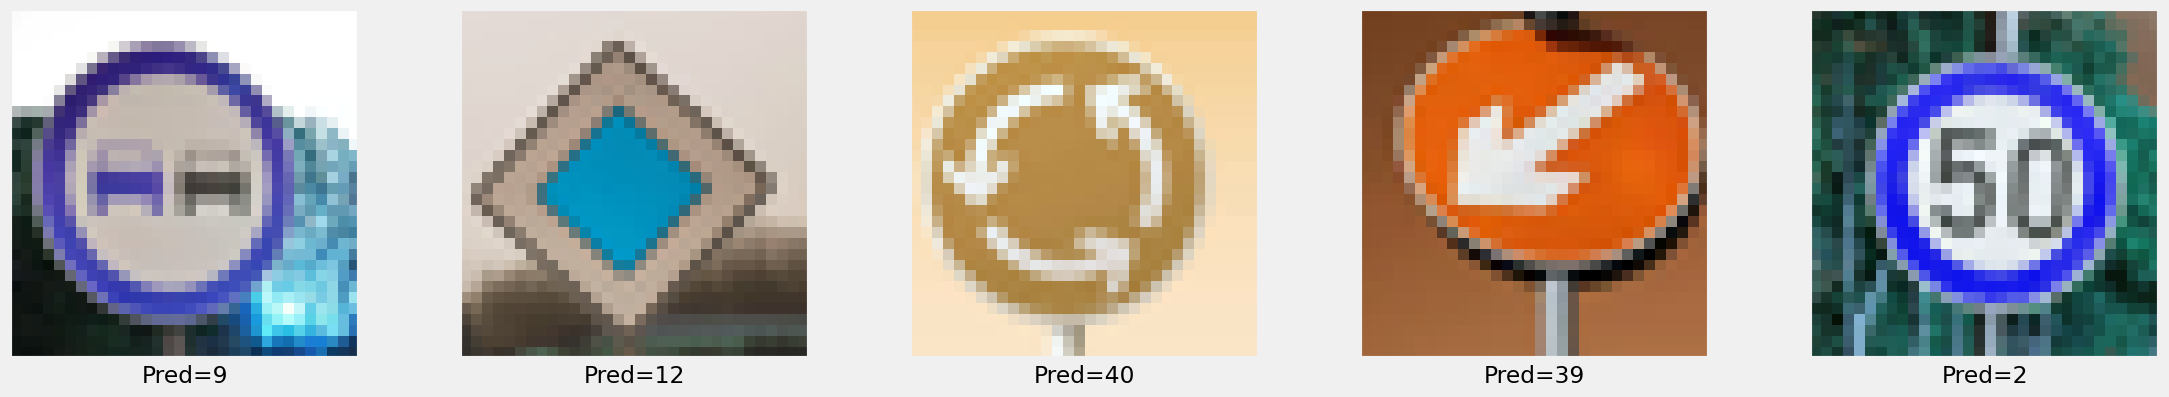

In [112]:
plt.figure(figsize = (25, 25))

start_index = 0
for i in range(5):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = inf_class[start_index + i]
    plt.xlabel('Pred={}'.format(prediction))
    plt.imshow(X_inf[start_index + i])
plt.show()

Let's compare the results with our meta data.

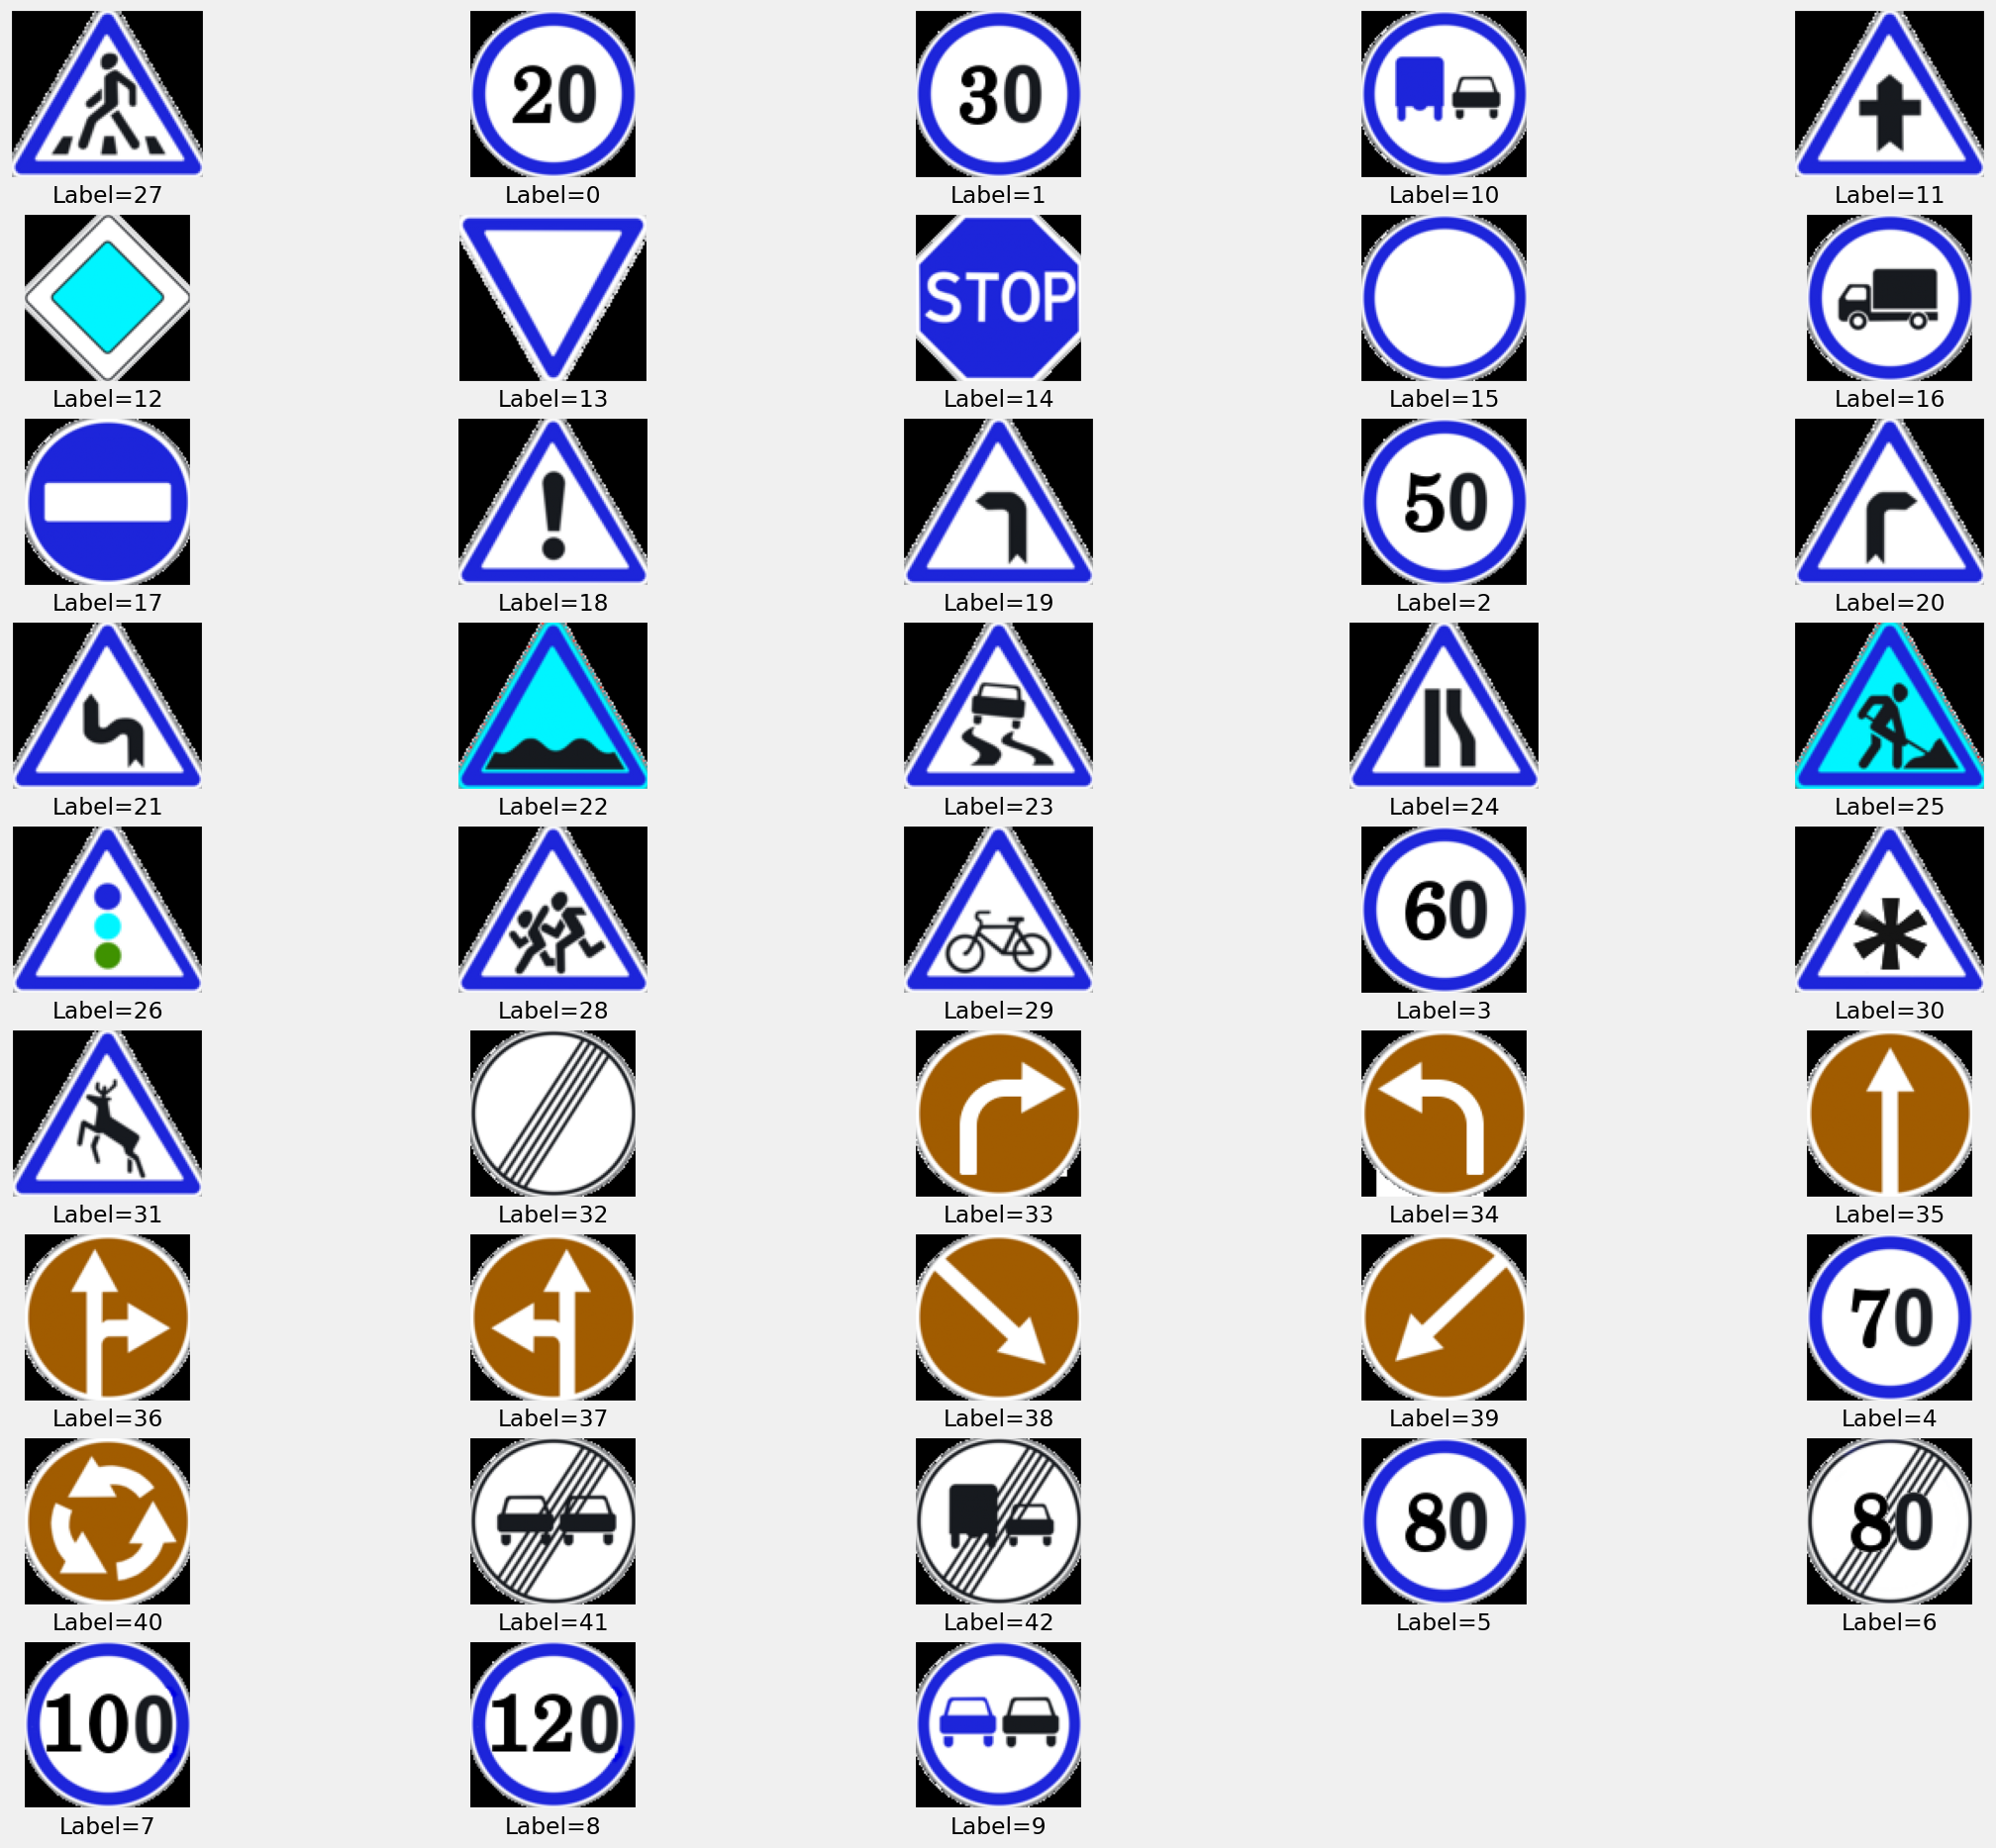

In [113]:
# Visualizing Meta Data
meta_labels = meta["ClassId"].values

plt.figure(figsize=(25,25))

start_index = 0
for i in range(43):
    plt.subplot(10, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    a = meta_labels[start_index + i]
    plt.xlabel('Label={}'.format(a))
    plt.imshow(X_meta[start_index + i])

By comparing each prediction with the meta data we can see that all the predictions are 100% correct.

# 11 - Conclusion

## 11.1 - Model Analysis

- The goal of the model is to predict traffic sign classification from images.
- Based on accuracy the model could predict with 96.96% accuracy.
- The model could predict all classes with good accuracy (>80%) except one class which is label 27.
- Model improvement was done by applying normalized and improved around 2% of accuracy.
- The model could be improved further by doing other image augmentation.
- The model could also be improved further by modifying the architectural of the model.
- The model have some difficulties in identifying triangle shaped signs.

## 11.2 - Overall Analysis

- Based on EDA, we gather some informations such as:
1. There are 43 types of traffic signs in this data-set.
2. The images have varied size of pixels but we resize it all to 32x32 pixels.
3. All the images is in RGB format.
4. There are 39209 images in the train-set and 12630 images in the test-set.

- From preprocessing, we gather some information such as:
1. We use 0.3 ratio to split the train-set and validation data
2. We convert our targets to binary classes by using keras.utils.to_categorical
3. We use ImageDataGenerator to do augmentation on the data by rotating, shifting, shearing, and zooming the images.